In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

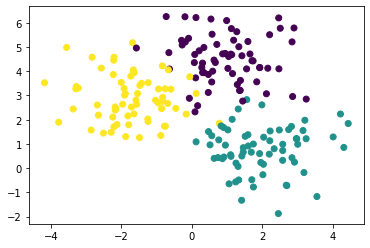

In [12]:
N = 200
C = 3
N_f = 2 
X,y = make_blobs(n_samples = N,n_features=N_f,centers = C, random_state=0)
plt.scatter(X[:,0],X[:,1],c=y)

## Adaboost

In [19]:
class AdaBoost():
    def __init__(self,n_estimators = 10, estimators_type = "decision_tree",max_depth=1):
        self.n_estimators = n_estimators
        self.estimators_type = estimators_type
        self.max_depth = max_depth
        self.alphas = []
        self.K = None
        if(self.estimators_type =='decision_tree'):
            self.models = [DecisionTreeClassifier(max_depth=self.max_depth) for i in range(self.n_estimators)]
        else:
            raise NotImplemented
    def fit(self,X,Y):
        sample_weights = np.ones_like(Y)*(1/X.shape[0])
        errors = []
        K = np.unique(Y)
        model_weights = []
        for i,estimator in enumerate(self.models):
            estimator.fit(X,Y,sample_weight = sample_weights)
            Y_pred = estimator.predict(X)
            indeces = np.where(Y_pred!=Y)[0]
            error = np.sum(sample_weights[indeces])/np.sum(sample_weights)
            if error ==1 :
                error-=0.000001
            elif error ==0:
                error+=0.000001
            errors.append(error)
            model_weights = np.log((1-error)/error) + np.log(len(K)-1)
            self.alphas.append(model_weights)
            sample_weights[indeces] *= np.exp(model_weights)
            sample_weights = sample_weights / np.sum(sample_weights)
            
    def predict(self,X):
        preds = []
        
        
            
            
            
            
            

In [20]:
model = AdaBoost()

In [21]:
model.fit(X,y)